In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The dataset can be found here:https://www.kaggle.com/uciml/student-alcohol-consumption/home. This project will be trained on math final grades and tested on predicting portugese final grades. 

In [2]:
df=pd.read_csv('student-mat.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


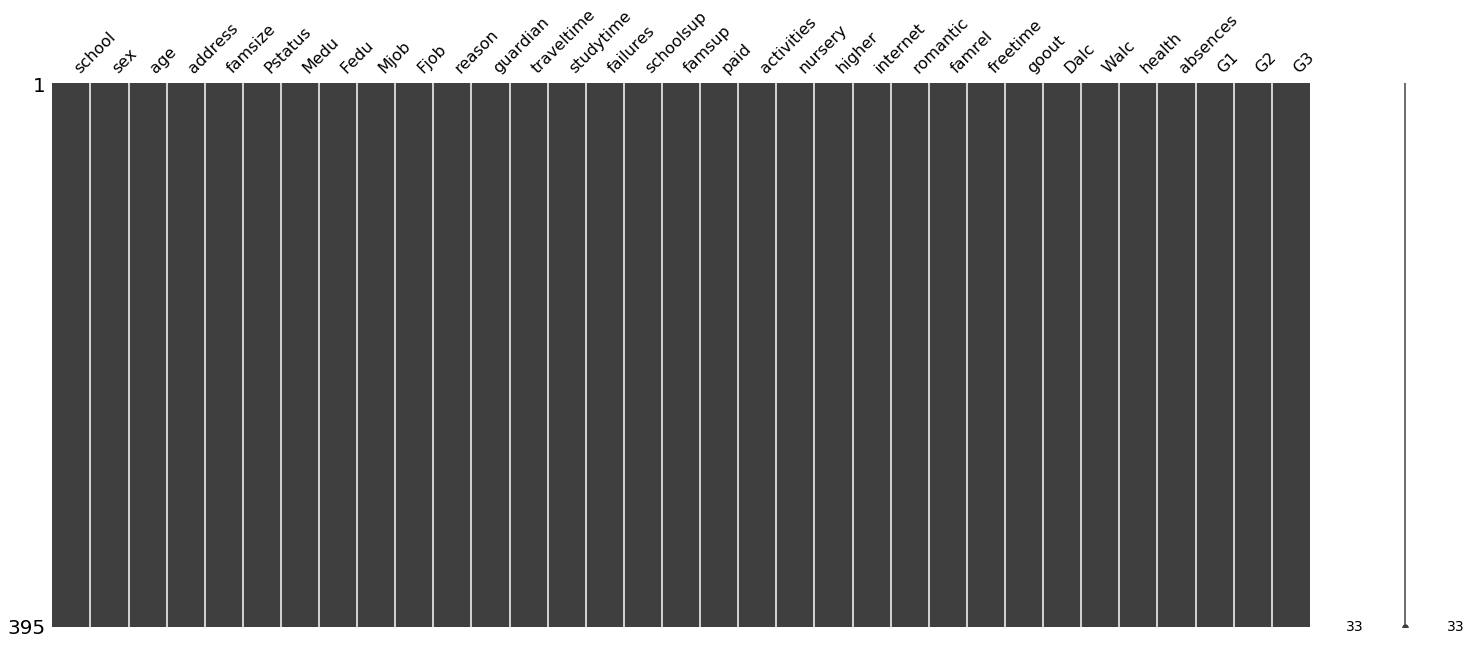

In [4]:
import missingno as msno
msno.matrix(df)

In [10]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
#Remove Outliers from Data Columns with Integers
columns=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
for col in columns:
    df=df[np.abs(df[col]-df[col].mean())<=(3*df[col].std())]

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.00000,348.000000,348.000000,348.000000,348.000000
mean,16.629310,2.784483,2.563218,1.393678,2.074713,0.212644,3.994253,3.209770,3.063218,1.324713,2.160920,3.54023,4.945402,11.152299,10.962644,10.678161
std,1.213732,1.082792,1.078489,0.595531,0.845496,0.504345,0.788952,0.977686,1.069096,0.593693,1.174892,1.39207,5.852156,3.326138,3.734918,4.564603
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.750000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.00000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.00000,3.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.250000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.00000,7.000000,14.000000,14.000000,14.000000
max,20.000000,4.000000,4.000000,3.000000,4.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.00000,30.000000,19.000000,19.000000,20.000000


# EDA

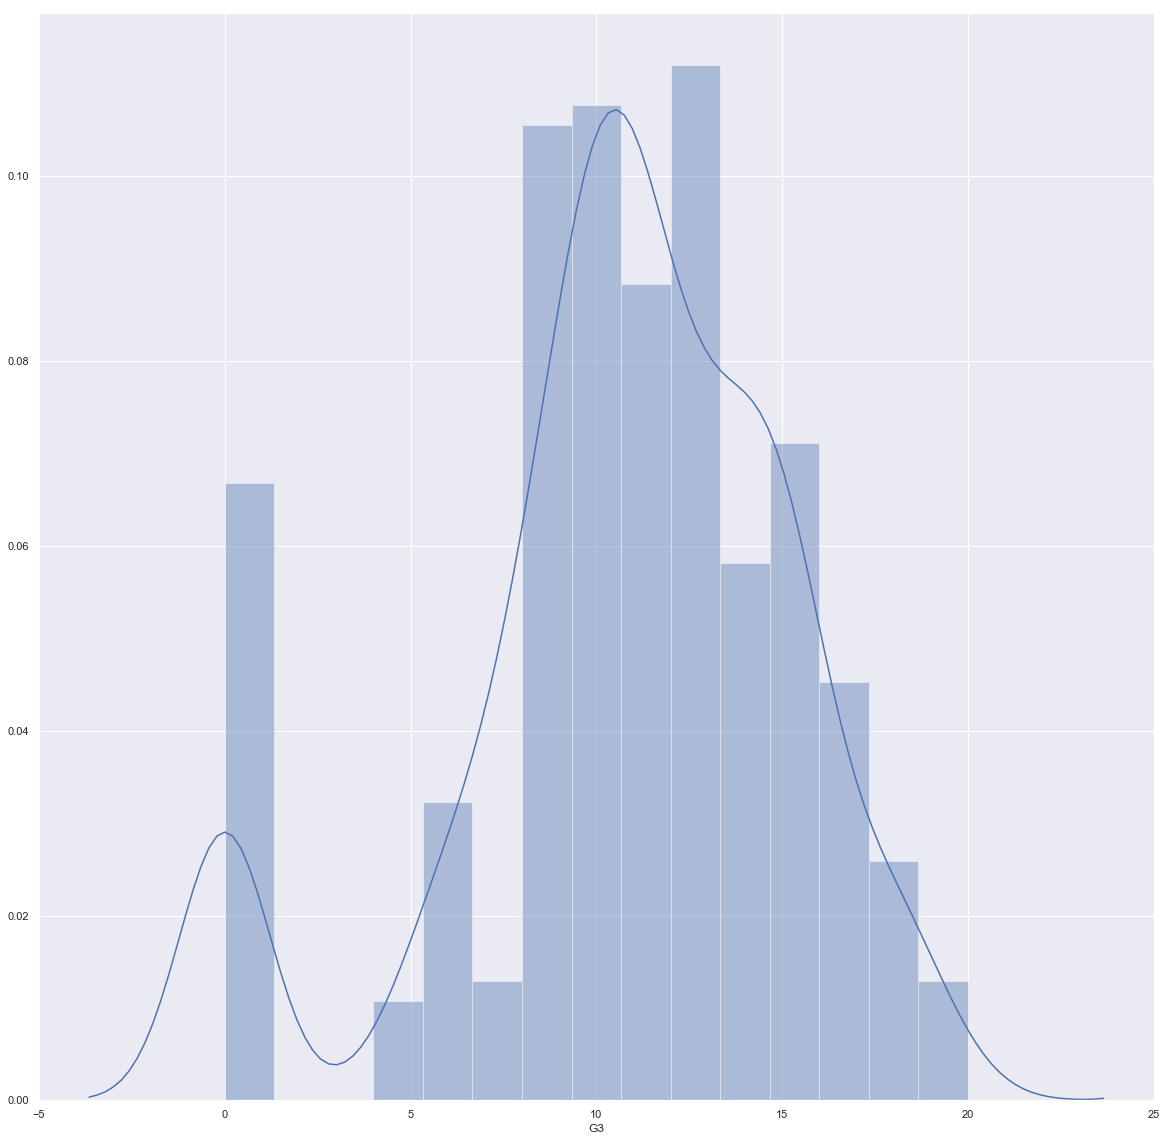

In [19]:
sns.distplot(df['G3'])
sns.set(rc={'figure.figsize':(10,10)})

The distribution isn't completely normal, but normality is present. The spike at 0 is due a high number of student achieving the same lowest score, 20 represents the maximum score in the class. 

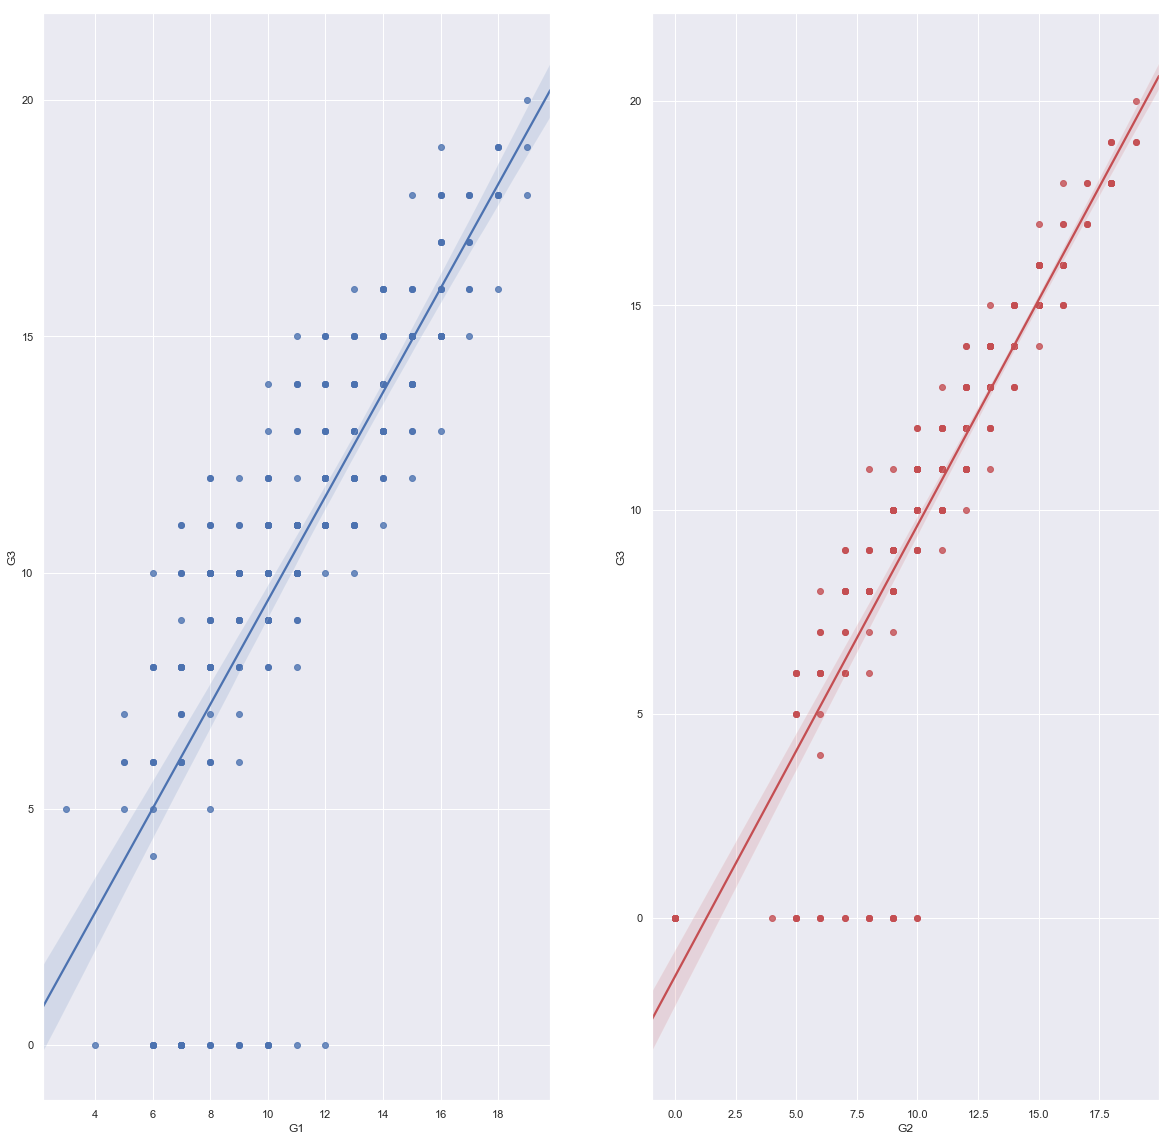

In [362]:
fig, (ax1, ax2)= plt.subplots(1, 2)
plt.subplot(1,2,1)
ax1=sns.regplot(x="G1", y="G3",data=df)

plt.subplot(1,2,2)
ax2=sns.regplot(x="G2", y="G3",data=df,color='r')
sns.set(rc={'figure.figsize':(40,40)})

The 1st and 2nd period grades fall in line with expected trend of higher leading to a higher final grade. 

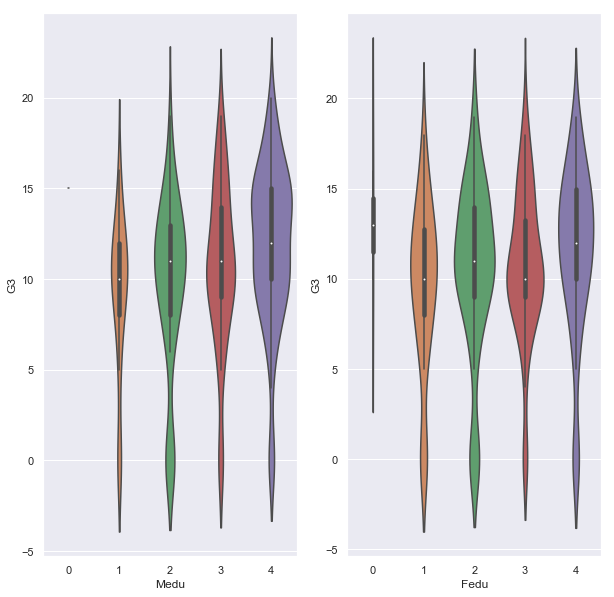

In [20]:
fig, (ax1, ax2)= plt.subplots(1, 2)
plt.subplot(1,2,1)
g=sns.violinplot(x='Medu',y="G3",data=df,scale='count')
 
plt.subplot(1,2,2)
g=sns.violinplot(x='Fedu',y="G3",data=df,scale='count')


sns.set(rc={'figure.figsize':(40,40)})

The mother's education follow much more a pattern as compared to fathers. Most of the observations fall in high higher educations for mothers. Fathers are more evenly distributed.  

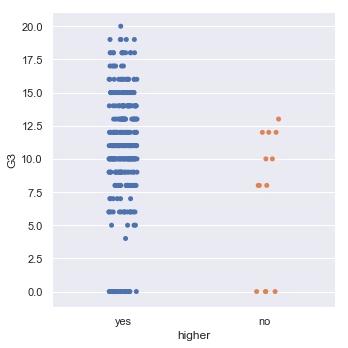

In [21]:
sns.catplot(x='higher',y='G3',data=df)

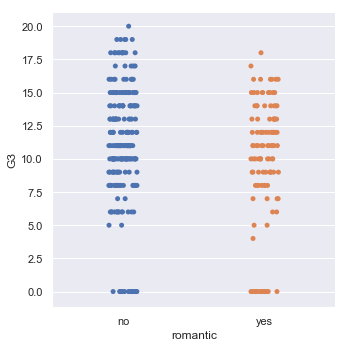

In [366]:
sns.catplot(x='romantic',y='G3',data=df)

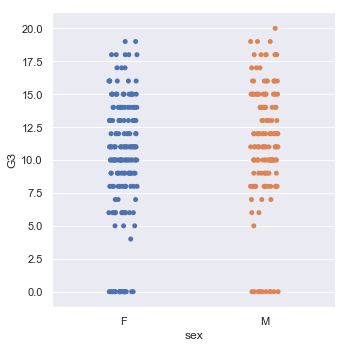

In [367]:
sns.catplot(x='sex',y='G3',data=df)

Students wanting to pursue higher education have a much higher G3 score.  Those in relationships perform 1pt worse than those not in relationships. Romantic_yes is negative correlated with G3 similiar to the trend shown in higher_no. Males are performing slightly better than females in the math course. 

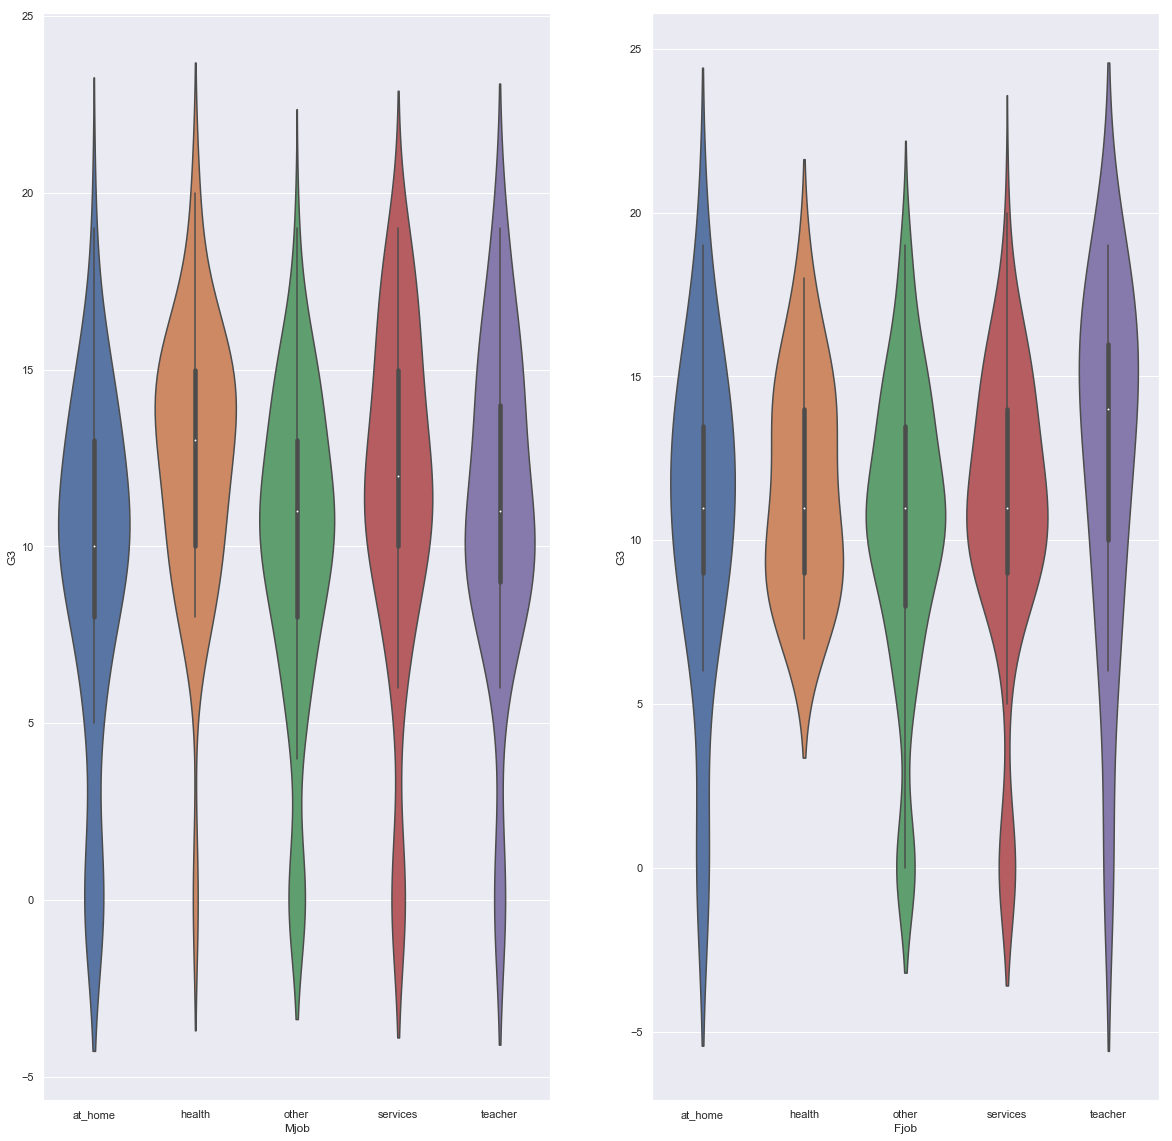

In [24]:
order=['at_home','health','other','services','teacher']

fig, (ax1, ax2)= plt.subplots(1, 2)
plt.subplot(1,2,1)
ax1=sns.violinplot(x='Mjob',y='G3',data=df,order=order)

plt.subplot(1,2,2)
ax2=sns.violinplot(x='Fjob',y='G3',data=df,order=order)

sns.set(rc={'figure.figsize':(10,10)})


The averages for the father's job are relatively similiar except for teacher,which is much higher. Health jobs for mothers is the dominant categories in G3 scores. 

# Correlation Matrix

In [5]:
#Get Categorical Values
df=pd.get_dummies(df) 

In [6]:
print('After removing outliers the shape of the dataset is {}.'.format(df.shape))

After removing outliers the shape of the dataset is (348, 59).


In [7]:
#Create Correlation Matrix Dataframe to choose 30 best features after cleaning with respect to Rating
corr_values=df.corr().values
df_=pd.DataFrame(corr_values)
df_.columns=df.columns
df_.index=df.columns
df_


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.139906,-0.121845,0.086854,0.055148,0.195050,0.024854,-0.011996,0.146925,0.087537,...,0.057757,-0.057757,0.049074,-0.049074,0.135268,-0.135268,0.077706,-0.077706,-0.177335,0.177335
Medu,-0.139906,1.000000,0.600271,-0.149600,0.049117,-0.148032,0.032280,0.042828,0.079020,0.010550,...,-0.114112,0.114112,-0.176580,0.176580,-0.142926,0.142926,-0.184668,0.184668,-0.009757,0.009757
Fedu,-0.121845,0.600271,1.000000,-0.135330,-0.062082,-0.120153,0.017363,0.010618,0.049011,0.010605,...,-0.101162,0.101162,-0.156787,0.156787,-0.117094,0.117094,-0.108893,0.108893,0.034169,-0.034169
traveltime,0.086854,-0.149600,-0.135330,1.000000,-0.121540,0.113870,-0.044239,-0.033353,-0.034676,0.044947,...,0.010094,-0.010094,0.039362,-0.039362,0.098924,-0.098924,0.098714,-0.098714,0.013559,-0.013559
studytime,0.055148,0.049117,-0.062082,-0.121540,1.000000,-0.084672,0.091371,-0.099198,-0.021181,-0.226445,...,-0.063579,0.063579,-0.077945,0.077945,-0.161017,0.161017,-0.057558,0.057558,-0.042323,0.042323
failures,0.195050,-0.148032,-0.120153,0.113870,-0.084672,1.000000,-0.098316,0.002788,0.049823,0.192215,...,-0.023839,0.023839,0.094114,-0.094114,0.157533,-0.157533,0.013557,-0.013557,-0.191555,0.191555
famrel,0.024854,0.032280,0.017363,-0.044239,0.091371,-0.098316,1.000000,0.109915,-0.002985,-0.125209,...,-0.029597,0.029597,0.021993,-0.021993,-0.037032,0.037032,-0.065762,0.065762,0.042110,-0.042110
freetime,-0.011996,0.042828,0.010618,-0.033353,-0.099198,0.002788,0.109915,1.000000,0.240930,0.125592,...,-0.103817,0.103817,0.027730,-0.027730,0.050801,-0.050801,-0.047376,0.047376,-0.012188,0.012188
goout,0.146925,0.079020,0.049011,-0.034676,-0.021181,0.049823,-0.002985,0.240930,1.000000,0.208205,...,-0.050839,0.050839,-0.008817,0.008817,0.045112,-0.045112,-0.077121,0.077121,0.017102,-0.017102
Dalc,0.087537,0.010550,0.010605,0.044947,-0.226445,0.192215,-0.125209,0.125592,0.208205,1.000000,...,0.081758,-0.081758,0.011241,-0.011241,0.147707,-0.147707,0.006436,-0.006436,0.070040,-0.070040


In [10]:
#Extract 20 highest features with rating
values=df_['G3'].nlargest(60)
labels=values.index[1:60]

#Top 20 Correlated Features
print('Top 20 Correlated Features')
values[1:60]


Top 20 Correlated Features


G2                   0.904496
G1                   0.802543
Medu                 0.201080
higher_yes           0.152316
romantic_no          0.144539
sex_M                0.138167
Mjob_health          0.130446
Fedu                 0.124737
address_U            0.119381
schoolsup_no         0.104309
Fjob_teacher         0.102654
Mjob_services        0.095097
famrel               0.079508
internet_yes         0.077773
reason_reputation    0.071072
famsize_LE3          0.065987
paid_yes             0.063498
studytime            0.062999
nursery_yes          0.062192
absences             0.059647
famsup_no            0.058465
reason_other         0.055505
Pstatus_A            0.052961
Fjob_health          0.047803
guardian_mother      0.035759
school_GP            0.032912
Mjob_teacher         0.031683
freetime             0.026149
guardian_father      0.015847
Fjob_services        0.010719
activities_no        0.001393
Fjob_at_home         0.000319
activities_yes      -0.001393
reason_hom

The features aren't that correlated as it drops off quickly from 0.80 to 0.21 decreases down to 0.05 by the 20th feature. 

# Training

In [649]:
x_values=values[1:25].append(values[50:60])
x_values_index=x_values.index

In [113]:
X=df.drop('G3',1)
Y=df.G3

# Lasso

In [24]:
import sklearn
from sklearn import linear_model
%matplotlib inline
#Lasso
lass = linear_model.Lasso(alpha=0.25,selection='random')
lassfit = lass.fit(X, Y)
print('R²:')
lassR2=lass.score(X, Y)
print(lassR2)

#Predictions
Y_pred=lass.predict(X)

print('')
#Cross Validation 
from sklearn.model_selection import cross_val_score
scorelass = cross_val_score(lass, X, Y, cv=5)
print('Cross Validation Scores')
print(scorelass)
print("%0.2f (+/- %0.2f)" % (scorelass.mean(), scorelass.std() * 2))
print('')

#Lasso Summary
Y_pred=np.array(Y_pred)
Y=np.array(Y)
Y_res=Y-Y_pred


#DataFrame
Z=pd.DataFrame()
Z['Y_pred']=Y_pred
Z['Y_pred']=np.where(Z['Y_pred']<0,0,Z['Y_pred'])
Z['Y_pred']=np.where(Z['Y_pred']>20,20,Z['Y_pred'])
Z['Y']=Y
Z['Y_res']=Y_res

#Summary
sum_data=Z[['Y','Y_pred','Y_res']]
sum_data.describe()

R²:
0.8319016703994626

Cross Validation Scores
[0.87879461 0.918809   0.83275991 0.76848481 0.71402008]
0.82 (+/- 0.15)



,Y,Y_pred,Y_res
count,348.000000,348.000000,3.480000e+02
mean,10.678161,10.703813,-1.286327e-15
std,4.564603,4.014576,1.871478e+00
min,0.000000,0.000000,-9.120831e+00
25%,9.000000,8.196940,-3.282922e-01
50%,11.000000,10.544577,3.093172e-01
75%,14.000000,13.658561,9.462976e-01
max,20.000000,20.000000,3.824700e+00


# Ridge

In [127]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing

# Ridge Model
ridgeregr = linear_model.Ridge(alpha=0.25, fit_intercept=True,solver='auto',random_state=65)
ridgefit = ridgeregr.fit(X, Y)
#R^2
print('R²:')
ridger2=ridgeregr.score(X, Y)
print(ridger2)

#Parameters
origparams = ridgeregr.coef_[0]

#Predictions
Y_pred=ridgeregr.predict(X)

print('')
#Cross Validation 
from sklearn.model_selection import cross_val_score
ridgescore = cross_val_score(ridgeregr, X, Y, cv=5)
print('Cross Validation Scores')
print(ridgescore)
print("%0.2f (+/- %0.2f)" % (ridgescore.mean(), ridgescore.std() * 2))

#Ridge Summary
#Create Arrays
Y_pred=np.array(Y_pred)
Y=np.array(Y)
Y_res=Y-Y_pred

#DataFrame
Z=pd.DataFrame()
Z['Y_pred']=Y_pred
Z['Y_pred']=np.where(Z['Y_pred']<0,0,Z['Y_pred'])
Z['Y_pred']=np.where(Z['Y_pred']>20,20,Z['Y_pred'])
Z['Y']=Y
Z['Y_res']=Y_res

#Summary
sum_data=Z[['Y','Y_pred','Y_res']]
sum_data.describe()

R²:
0.8533859256970854

Cross Validation Scores
[0.83675733 0.86297155 0.76231289 0.74747365 0.69618771]
0.78 (+/- 0.12)


,Y,Y_pred,Y_res
count,348.000000,348.000000,3.480000e+02
mean,10.678161,10.703208,-1.745730e-15
std,4.564603,4.137561,1.747796e+00
min,0.000000,0.000000,-7.547390e+00
25%,9.000000,8.089433,-6.113925e-01
50%,11.000000,10.662066,2.271894e-01
75%,14.000000,13.516512,9.840806e-01
max,20.000000,20.000000,4.888826e+00


# KNN

In [114]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
r2_val = [] #to store rmse values for different k
knnscores_std=[]
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X, Y)  #fit the model
    score=knn.score(X, Y) #r2 score
    r2_val.append(score) #store r2
    print('R2 value for k= ' , K , 'is:', score)
    knnscore = cross_val_score(knn, X, Y, cv=5)
    print('Cross Validation Scores')
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))
    knnscores_std.append(knnscore.std()*2)# store st dev values

R2 value for k=  1 is: 1.0
Cross Validation Scores
0.66 (+/- 0.14)
R2 value for k=  2 is: 0.9166315583635132
Cross Validation Scores
0.74 (+/- 0.13)
R2 value for k=  3 is: 0.9157670992009616
Cross Validation Scores
0.75 (+/- 0.13)
R2 value for k=  4 is: 0.8999647857095163
Cross Validation Scores
0.79 (+/- 0.08)
R2 value for k=  5 is: 0.8950200792997205
Cross Validation Scores
0.80 (+/- 0.07)
R2 value for k=  6 is: 0.8864984329773219
Cross Validation Scores
0.80 (+/- 0.05)
R2 value for k=  7 is: 0.87927210324135
Cross Validation Scores
0.81 (+/- 0.06)
R2 value for k=  8 is: 0.8796219004667682
Cross Validation Scores
0.80 (+/- 0.06)
R2 value for k=  9 is: 0.8763136099155151
Cross Validation Scores
0.80 (+/- 0.08)
R2 value for k=  10 is: 0.8692633456596599
Cross Validation Scores
0.80 (+/- 0.08)
R2 value for k=  11 is: 0.8653615570761614
Cross Validation Scores
0.80 (+/- 0.08)
R2 value for k=  12 is: 0.8620870667370422
Cross Validation Scores
0.79 (+/- 0.09)
R2 value for k=  13 is: 0.8574

[Text(0, 0.5, '2 *Standard Deviation'), Text(0.5, 0, 'n')]

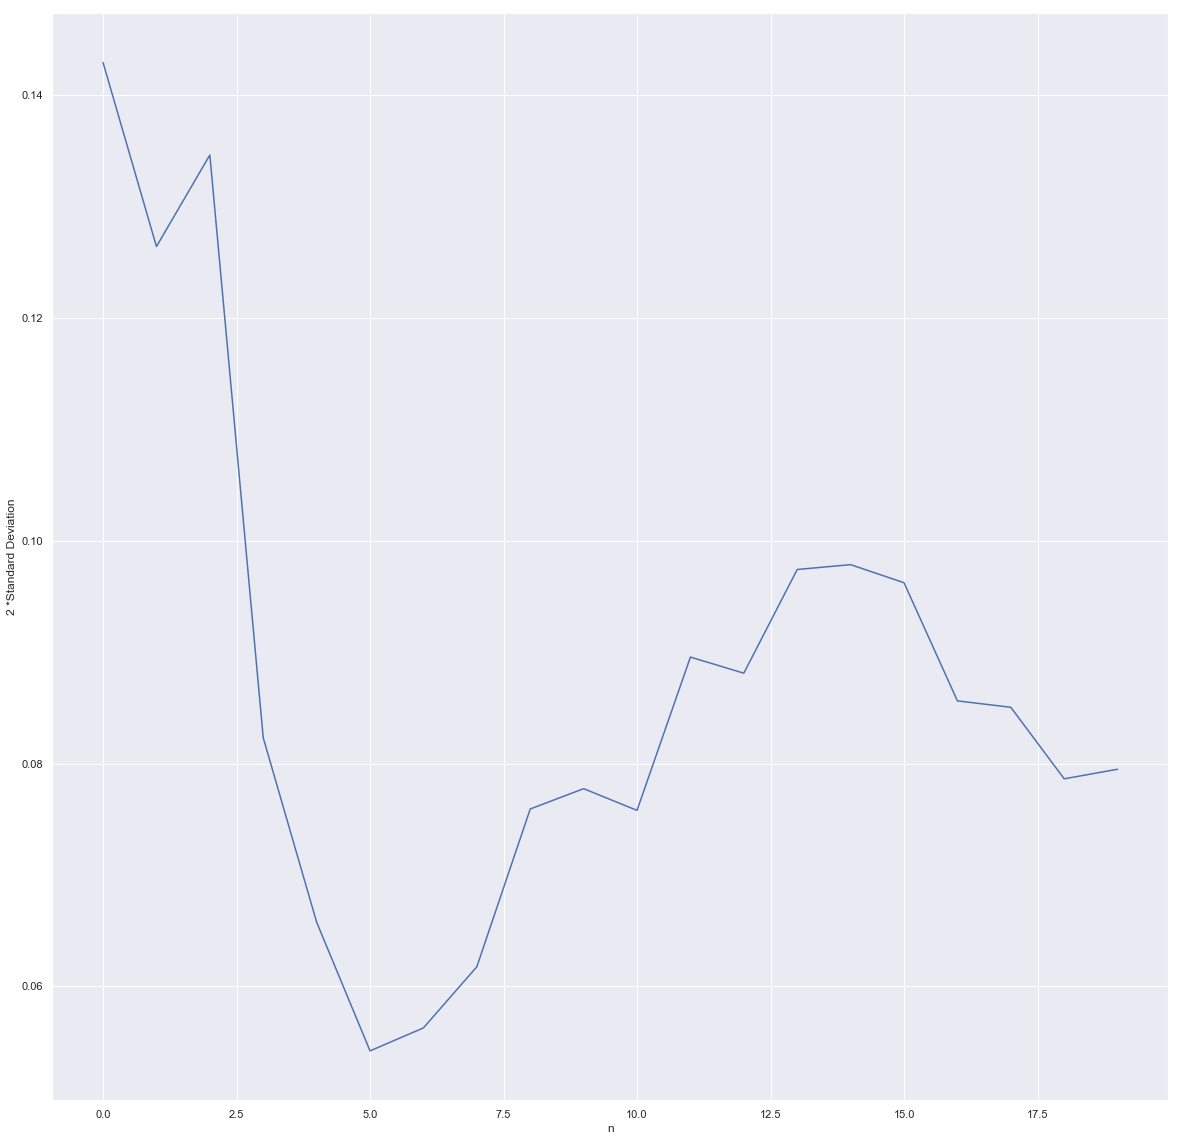

In [115]:
K=np.array(list(range(0,20)))
ax=sns.lineplot(K,knnscores_std[0:20])
ax.set(xlabel='n', ylabel='2 *Standard Deviation')

From here I looked at the values up to n=20 and checked the cross validation choosing n=4 finding a good pairing of reducing the standard deviation in cross validation while still fitting the input well. It underpredicts on the max end, but still seems to fit well. 

In [129]:
number=4

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=number)
knn.fit(X, Y)

#R^2
print('R²:')
knnr2=knn.score(X, Y)
print(knnr2)

#Predictions
Y_pred=knn.predict(X)
print('')
#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn, X, Y, cv=5)
print('Cross Validation Scores')
print(knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

#KNN Summary
#Create Arrays
Y_pred=np.array(Y_pred)
Y=np.array(Y)
Y_res=Y-Y_pred

#DataFrame
Z=pd.DataFrame()
Z['Y_pred']=Y_pred
Z['Y_pred']=np.where(Z['Y_pred']<0,0,Z['Y_pred'])
Z['Y_pred']=np.where(Z['Y_pred']>20,20,Z['Y_pred'])
Z['Y']=Y
Z['Y_res']=Y_res

#Summary
sum_data=Z[['Y','Y_pred','Y_res']]
sum_data.describe()

R²:
0.8999647857095163

Cross Validation Scores
[0.76197198 0.7730097  0.74278655 0.86001605 0.80644515]
0.79 (+/- 0.08)


,Y,Y_pred,Y_res
count,348.000000,348.000000,348.000000
mean,10.678161,10.612069,0.066092
std,4.564603,4.150754,1.442190
min,0.000000,0.000000,-7.000000
25%,9.000000,8.500000,-0.500000
50%,11.000000,11.000000,0.000000
75%,14.000000,13.500000,0.750000
max,20.000000,18.750000,6.750000


# SVR

In [74]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
r2_val = [] #to store rmse values for different k
for C in range(1000):
    C = C+1
    svr = SVR(gamma='auto',C=C,epsilon=0.1)

    svr.fit(X, Y)  #fit the model
    score=svr.score(X, Y) #r2 score
    r2_val.append(score) #store r2
    print('R2 value for C= ' , C , 'is:', score)
    svrscore = cross_val_score(knn, X, Y, cv=5)
    print('Cross Validation Scores')
    print("%0.2f (+/- %0.2f)" % (svrscore.mean(), svrscore.std() * 2))
     

R2 value for C=  1 is: 0.8245801277332412
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  2 is: 0.8886973375289169
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  3 is: 0.9129447544688502
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  4 is: 0.9290524868938183
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  5 is: 0.9406396390980137
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  6 is: 0.949218083214329
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  7 is: 0.9565392922127912
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  8 is: 0.9627035755428738
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  9 is: 0.967703088340781
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  10 is: 0.971868287974031
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  11 is: 0.9750877955750358
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  12 is: 0.9778257064029053
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C= 

R2 value for C=  103 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  104 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  105 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  106 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  107 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  108 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  109 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  110 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  111 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  112 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  113 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  114 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

R2 value for C=  203 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  204 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  205 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  206 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  207 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  208 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  209 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  210 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  211 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  212 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  213 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  214 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  305 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  306 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  307 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  308 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  309 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  310 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  311 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  312 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  313 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  314 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  315 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  316 is: 0.999530230

R2 value for C=  403 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  404 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  405 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  406 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  407 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  408 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  409 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  410 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  411 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  412 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  413 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  414 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

R2 value for C=  505 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  506 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  507 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  508 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  509 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  510 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  511 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  512 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  513 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  514 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  515 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  516 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  606 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  607 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  608 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  609 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  610 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  611 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  612 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  613 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  614 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  615 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  616 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  617 is: 0.999530230

R2 value for C=  707 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  708 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  709 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  710 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  711 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  712 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  713 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  714 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  715 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  716 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  717 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  718 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

R2 value for C=  806 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  807 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  808 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  809 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  810 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  811 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  812 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  813 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  814 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  815 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  816 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  817 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/

Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  905 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  906 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  907 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  908 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  909 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  910 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  911 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  912 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  913 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  914 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  915 is: 0.9995302306485331
Cross Validation Scores
0.81 (+/- 0.07)
R2 value for C=  916 is: 0.999530230

[(0.98, 1)]

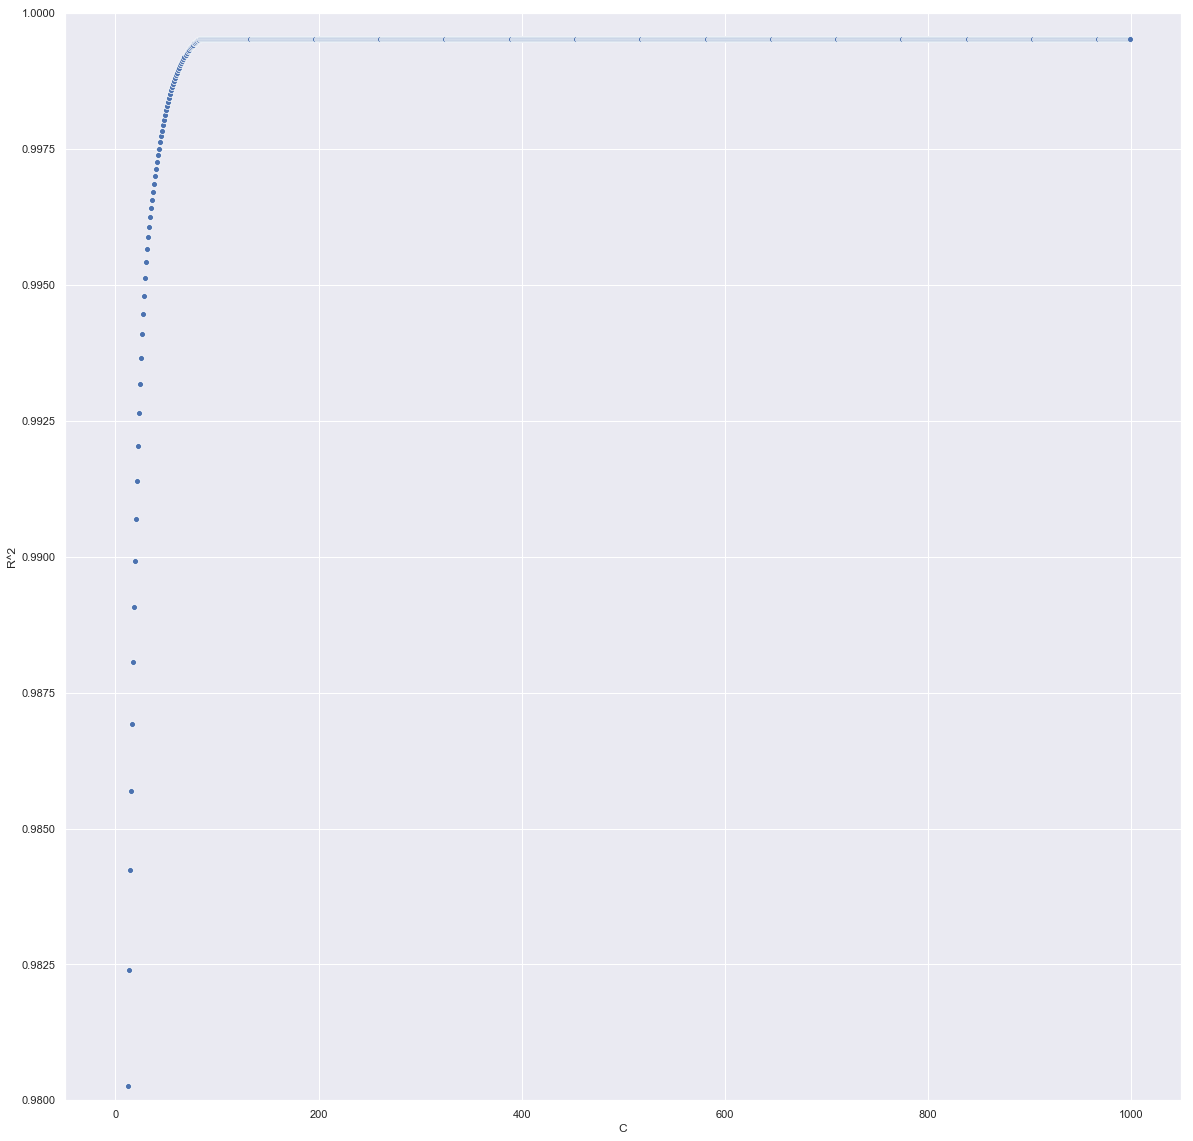

In [97]:
C=np.array(list(range(0, 1000)))
ax=sns.scatterplot(C,r2_val)
ax.set(xlabel='C', ylabel='R^2')
ax.set(ylim=(0.98, 1))

In [131]:
from sklearn.svm import SVR
svr = SVR(gamma='auto',C=1,epsilon=0.1)
svr.fit(X,Y)

print('\n Percentage accuracy')
svrr2=svr.score(X, Y)
print(svrr2)

#Predictions
Y_pred=svr.predict(X)
print('')
#Cross Validation 
from sklearn.model_selection import cross_val_score
svrscore = cross_val_score(svr, X, Y, cv=5)
print('Cross Validation Scores')
print(svrscore)
print("%0.2f (+/- %0.2f)" % (svrscore.mean(), svrscore.std() * 2))

#SVR Regression Summary
#Create Arrays
Y_pred=np.array(Y_pred)
Y=np.array(Y)
Y_res=Y-Y_pred


#DataFrame
Z=pd.DataFrame()
Z['Y_pred']=Y_pred
Z['Y_pred']=np.where(Z['Y_pred']<0,0,Z['Y_pred'])
Z['Y_pred']=np.where(Z['Y_pred']>20,20,Z['Y_pred'])
Z['Y']=Y
Z['Y_res']=Y_res

#Summary
sum_data=Z[['Y','Y_pred','Y_res']]
sum_data.describe()


 Percentage accuracy
0.8245801277332412

Cross Validation Scores
[0.8800475  0.72897754 0.73949841 0.67918336 0.6354082 ]
0.73 (+/- 0.17)


,Y,Y_pred,Y_res
count,348.000000,348.000000,348.000000
mean,10.678161,11.012224,-0.334063
std,4.564603,3.374667,1.882301
min,0.000000,2.264643,-8.903897
25%,9.000000,8.778754,-0.398194
50%,11.000000,10.903624,-0.002538
75%,14.000000,13.716999,0.414709
max,20.000000,18.100068,5.196925


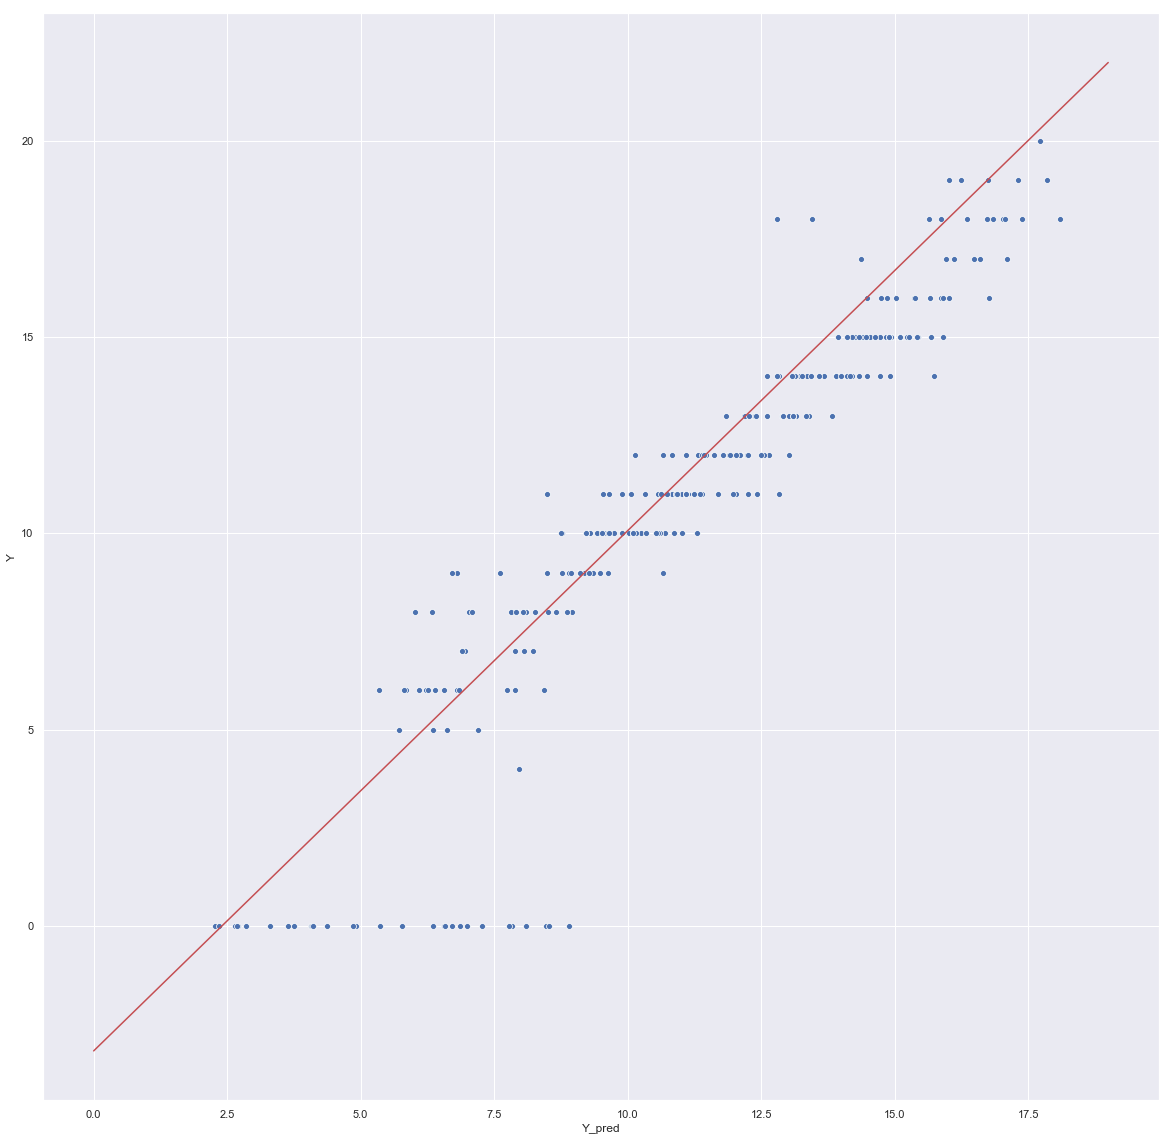

In [132]:
sns.scatterplot(y='Y',x='Y_pred',data=Z)
fit=np.polyfit(Y_pred,Y,1)
xp = np.linspace(0, 20, 20)
p = np.poly1d(fit)
p(xp)
plt.plot(p(xp), 'r')

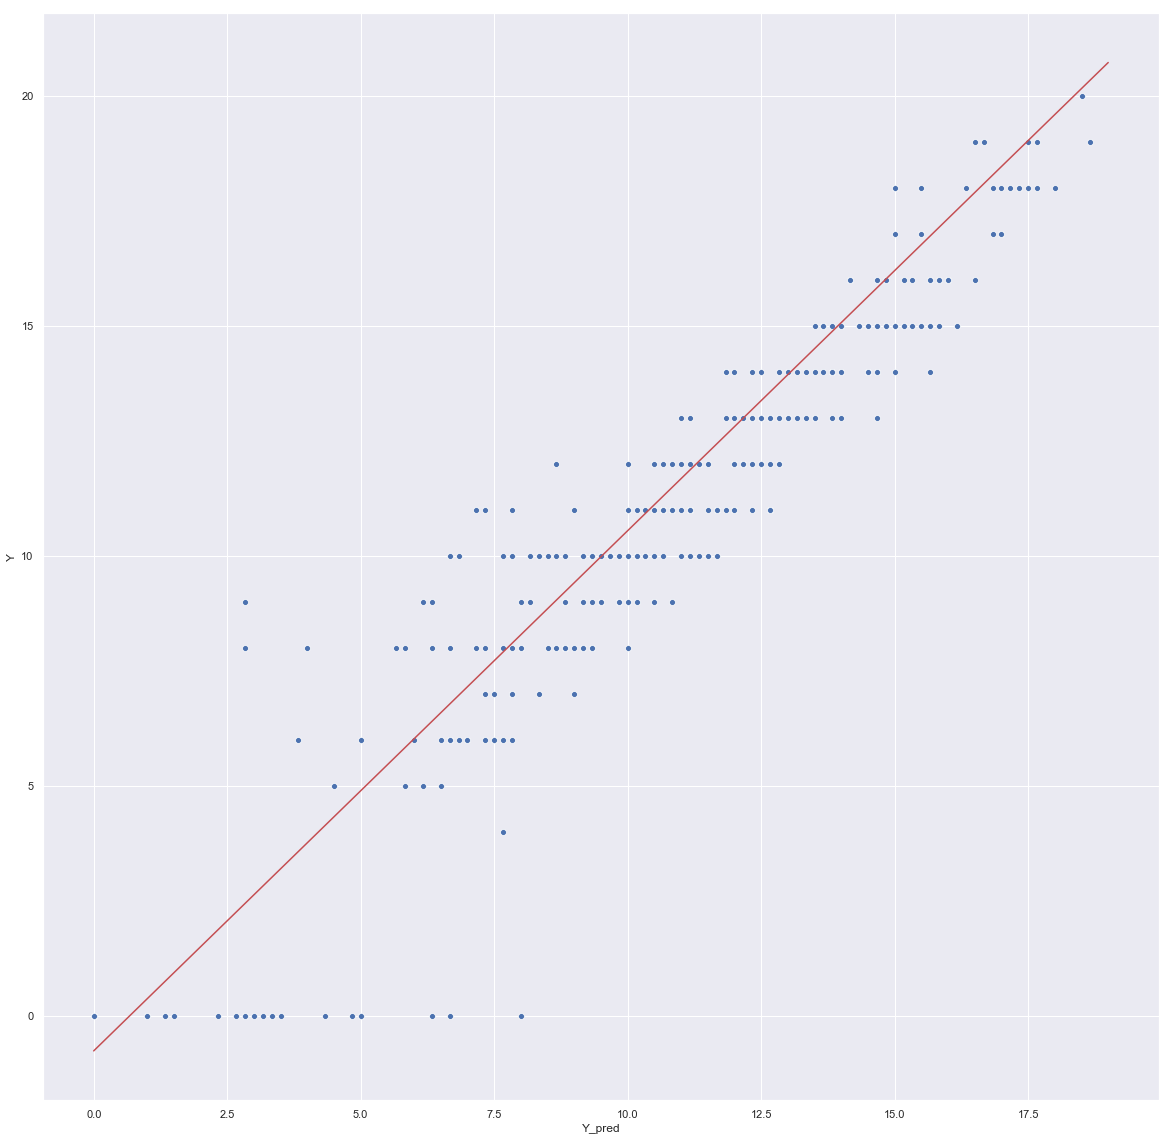

In [95]:
sns.scatterplot(y='Y',x='Y_pred',data=Z)
fit=np.polyfit(Y_pred,Y,1)
xp = np.linspace(0, 20, 20)
p = np.poly1d(fit)
p(xp)
plt.plot(p(xp), 'r')

KNN will be chosen as it has the best accuracy and the cross validation standard deviation is the lowest as well. SVR could have been used, but as C increases the error reduces the data set. This doesn't make for a better model. Lasso was used, but there aren't a ton of features and there is a high correlation after applying get dummies. Ridge worked relatively well, but the standard deviation performed worse than that of KNN. Logistic regression had poor cross validation. 

KNN follows the dataset well. When n=4 for knn, the accuracy was higher, but the cross validation standard deviation mean decreases as a result. So going forward, The portugese class will be used as the testset with a KNN model using n=4 intially. 

# Testing 

In [22]:
df_test=pd.read_csv('student-por.csv')

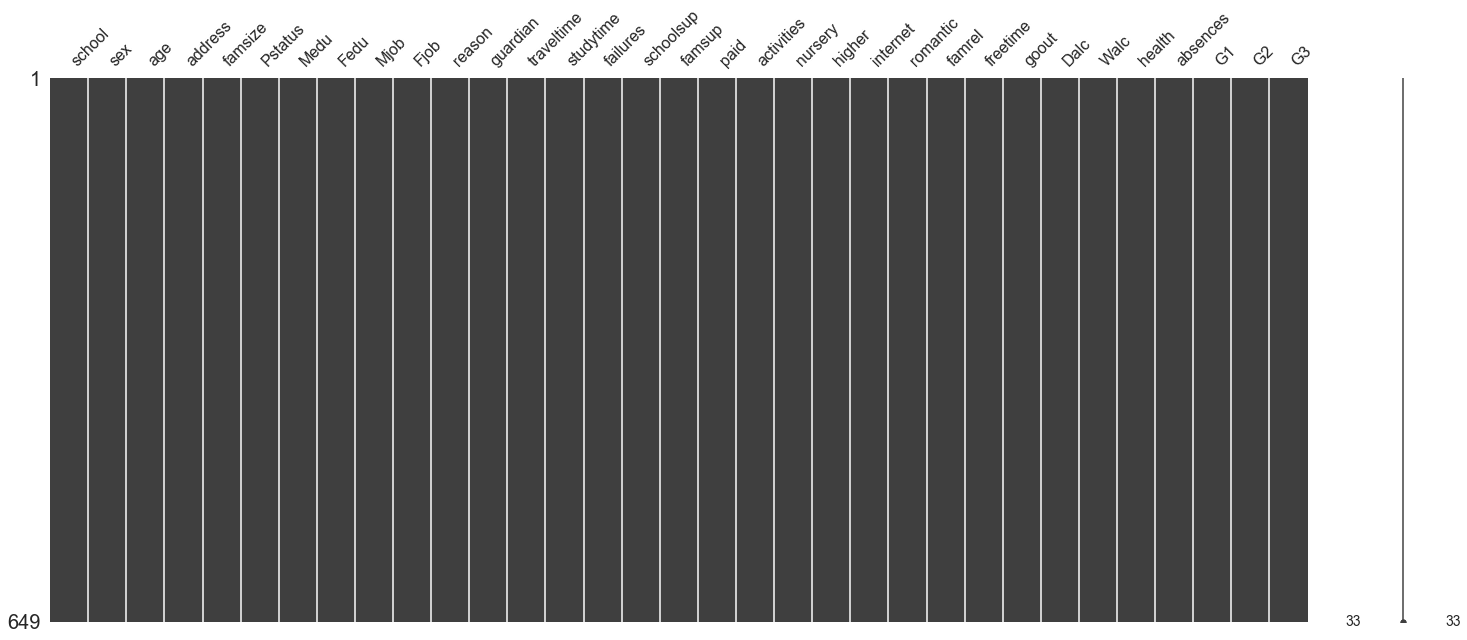

In [120]:
msno.matrix(df_test)

In [121]:
df_test.info()
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [23]:
columns=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3']
for col in columns:
    df_test=df_test[np.abs(df_test[col]-df_test[col].mean())<=(3*df_test[col].std())]

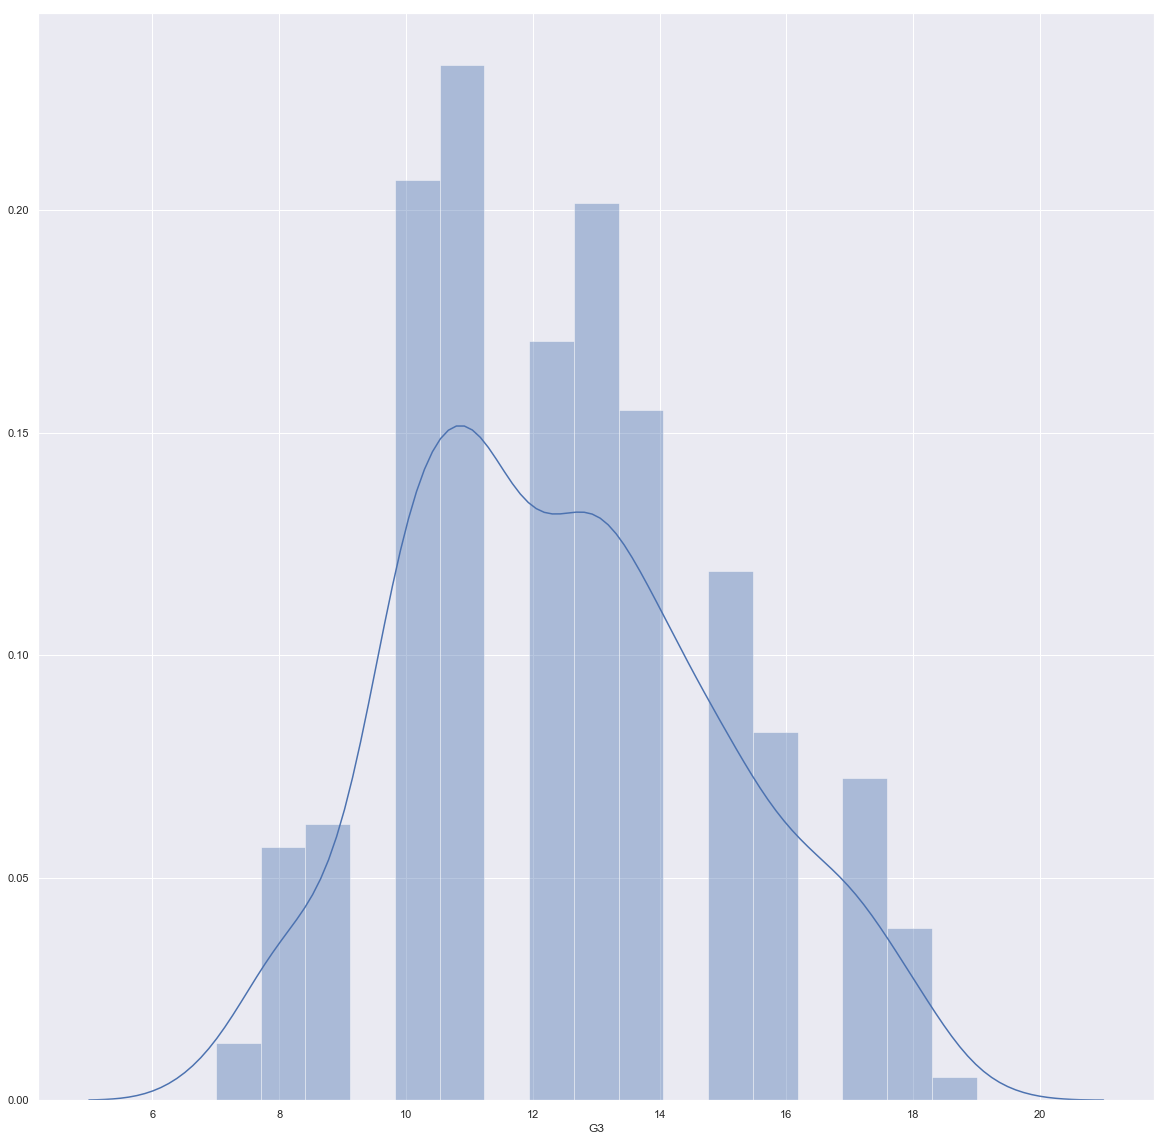

In [126]:
sns.distplot(df_test['G3'])
sns.set(rc={'figure.figsize':(20,20)})

# Correlation Matrix

In [30]:
df_test=pd.get_dummies(df_test)

In [32]:
#Create Correlation Matrix Dataframe to choose 30 best features after cleaning with respect to Rating
corr_values=df.corr().values
df_test_=pd.DataFrame(corr_values)
df_test_.columns=df.columns
df_test_.index=df.columns
df_test_

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.139906,-0.121845,0.086854,0.055148,0.195050,0.024854,-0.011996,0.146925,0.087537,...,0.057757,-0.057757,0.049074,-0.049074,0.135268,-0.135268,0.077706,-0.077706,-0.177335,0.177335
Medu,-0.139906,1.000000,0.600271,-0.149600,0.049117,-0.148032,0.032280,0.042828,0.079020,0.010550,...,-0.114112,0.114112,-0.176580,0.176580,-0.142926,0.142926,-0.184668,0.184668,-0.009757,0.009757
Fedu,-0.121845,0.600271,1.000000,-0.135330,-0.062082,-0.120153,0.017363,0.010618,0.049011,0.010605,...,-0.101162,0.101162,-0.156787,0.156787,-0.117094,0.117094,-0.108893,0.108893,0.034169,-0.034169
traveltime,0.086854,-0.149600,-0.135330,1.000000,-0.121540,0.113870,-0.044239,-0.033353,-0.034676,0.044947,...,0.010094,-0.010094,0.039362,-0.039362,0.098924,-0.098924,0.098714,-0.098714,0.013559,-0.013559
studytime,0.055148,0.049117,-0.062082,-0.121540,1.000000,-0.084672,0.091371,-0.099198,-0.021181,-0.226445,...,-0.063579,0.063579,-0.077945,0.077945,-0.161017,0.161017,-0.057558,0.057558,-0.042323,0.042323
failures,0.195050,-0.148032,-0.120153,0.113870,-0.084672,1.000000,-0.098316,0.002788,0.049823,0.192215,...,-0.023839,0.023839,0.094114,-0.094114,0.157533,-0.157533,0.013557,-0.013557,-0.191555,0.191555
famrel,0.024854,0.032280,0.017363,-0.044239,0.091371,-0.098316,1.000000,0.109915,-0.002985,-0.125209,...,-0.029597,0.029597,0.021993,-0.021993,-0.037032,0.037032,-0.065762,0.065762,0.042110,-0.042110
freetime,-0.011996,0.042828,0.010618,-0.033353,-0.099198,0.002788,0.109915,1.000000,0.240930,0.125592,...,-0.103817,0.103817,0.027730,-0.027730,0.050801,-0.050801,-0.047376,0.047376,-0.012188,0.012188
goout,0.146925,0.079020,0.049011,-0.034676,-0.021181,0.049823,-0.002985,0.240930,1.000000,0.208205,...,-0.050839,0.050839,-0.008817,0.008817,0.045112,-0.045112,-0.077121,0.077121,0.017102,-0.017102
Dalc,0.087537,0.010550,0.010605,0.044947,-0.226445,0.192215,-0.125209,0.125592,0.208205,1.000000,...,0.081758,-0.081758,0.011241,-0.011241,0.147707,-0.147707,0.006436,-0.006436,0.070040,-0.070040


In [34]:
#Extract 20 highest features with rating
values=df_test_['G3'].nlargest(60)
labels=values.index[1:63]

#Top 20 Correlated Features
print('Top 20 Correlated Features')
values[1:60]

Top 20 Correlated Features


G2                   0.904496
G1                   0.802543
Medu                 0.201080
higher_yes           0.152316
romantic_no          0.144539
sex_M                0.138167
Mjob_health          0.130446
Fedu                 0.124737
address_U            0.119381
schoolsup_no         0.104309
Fjob_teacher         0.102654
Mjob_services        0.095097
famrel               0.079508
internet_yes         0.077773
reason_reputation    0.071072
famsize_LE3          0.065987
paid_yes             0.063498
studytime            0.062999
nursery_yes          0.062192
absences             0.059647
famsup_no            0.058465
reason_other         0.055505
Pstatus_A            0.052961
Fjob_health          0.047803
guardian_mother      0.035759
school_GP            0.032912
Mjob_teacher         0.031683
freetime             0.026149
guardian_father      0.015847
Fjob_services        0.010719
activities_no        0.001393
Fjob_at_home         0.000319
activities_yes      -0.001393
reason_hom

Most of the same features are strongly correlated and follow a similar pattern to that of the training set.

In [134]:
X=df_test.drop('G3',1)
Y=df_test.G3
Y.describe()

count    548.000000
mean      12.498175
std        2.547178
min        7.000000
25%       11.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

# Final Test Model

In [135]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
r2_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X, Y)  #fit the model
    score=knn.score(X, Y) #r2 score
    r2_val.append(score) #store r2
    print('R2 value for k= ' , K , 'is:', score)
    knnscore = cross_val_score(knn, X, Y, cv=5)
    print('Cross Validation Scores')
    print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

R2 value for k=  1 is: 1.0
Cross Validation Scores
0.66 (+/- 0.23)
R2 value for k=  2 is: 0.9373766936387414
Cross Validation Scores
0.75 (+/- 0.14)
R2 value for k=  3 is: 0.9202278792108552
Cross Validation Scores
0.78 (+/- 0.11)
R2 value for k=  4 is: 0.9087946840143538
Cross Validation Scores
0.79 (+/- 0.09)
R2 value for k=  5 is: 0.9019216176457734
Cross Validation Scores
0.81 (+/- 0.08)
R2 value for k=  6 is: 0.9003474644929953
Cross Validation Scores
0.82 (+/- 0.08)
R2 value for k=  7 is: 0.8956704715399266
Cross Validation Scores
0.82 (+/- 0.09)
R2 value for k=  8 is: 0.8933061581581314
Cross Validation Scores
0.82 (+/- 0.08)
R2 value for k=  9 is: 0.8917030496944158
Cross Validation Scores
0.83 (+/- 0.08)
R2 value for k=  10 is: 0.8914735987486959
Cross Validation Scores
0.82 (+/- 0.08)
R2 value for k=  11 is: 0.8877578720035453
Cross Validation Scores
0.82 (+/- 0.08)
R2 value for k=  12 is: 0.885904812816566
Cross Validation Scores
0.82 (+/- 0.08)
R2 value for k=  13 is: 0.883

In [137]:
from sklearn import neighbors
number=6
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=number)
knn.fit(X, Y)

#R^2
print('R²:')
knnr2=knn.score(X, Y)
print(knnr2)

#Predictions
Y_pred=knn.predict(X)
print('')
#Cross Validation 
from sklearn.model_selection import cross_val_score
knnscore = cross_val_score(knn, X, Y, cv=5)
print('Cross Validation Scores')
print(knnscore)
print("%0.2f (+/- %0.2f)" % (knnscore.mean(), knnscore.std() * 2))

#KNN Summary
#Create Arrays
Y_pred=np.array(Y_pred)
Y=np.array(Y)
Y_res=Y-Y_pred

#DataFrame
Z=pd.DataFrame()
Z['Y_pred']=Y_pred
Z['Y_pred']=np.where(Z['Y_pred']<0,0,Z['Y_pred'])
Z['Y_pred']=np.where(Z['Y_pred']>20,20,Z['Y_pred'])
Z['Y']=Y
Z['Y_res']=Y_res

#Summary
sum_data=Z[['Y','Y_pred','Y_res']]
sum_data.describe()

R²:
0.9003474644929953

Cross Validation Scores
[0.76211073 0.8113527  0.80079696 0.85576041 0.87652547]
0.82 (+/- 0.08)


,Y,Y_pred,Y_res
count,548.000000,548.000000,548.000000
mean,12.498175,12.566910,-0.068735
std,2.547178,2.227281,0.801139
min,7.000000,7.833333,-2.666667
25%,11.000000,10.833333,-0.666667
50%,12.000000,12.333333,-0.166667
75%,14.000000,14.000000,0.500000
max,19.000000,18.166667,3.000000


(0, 20)

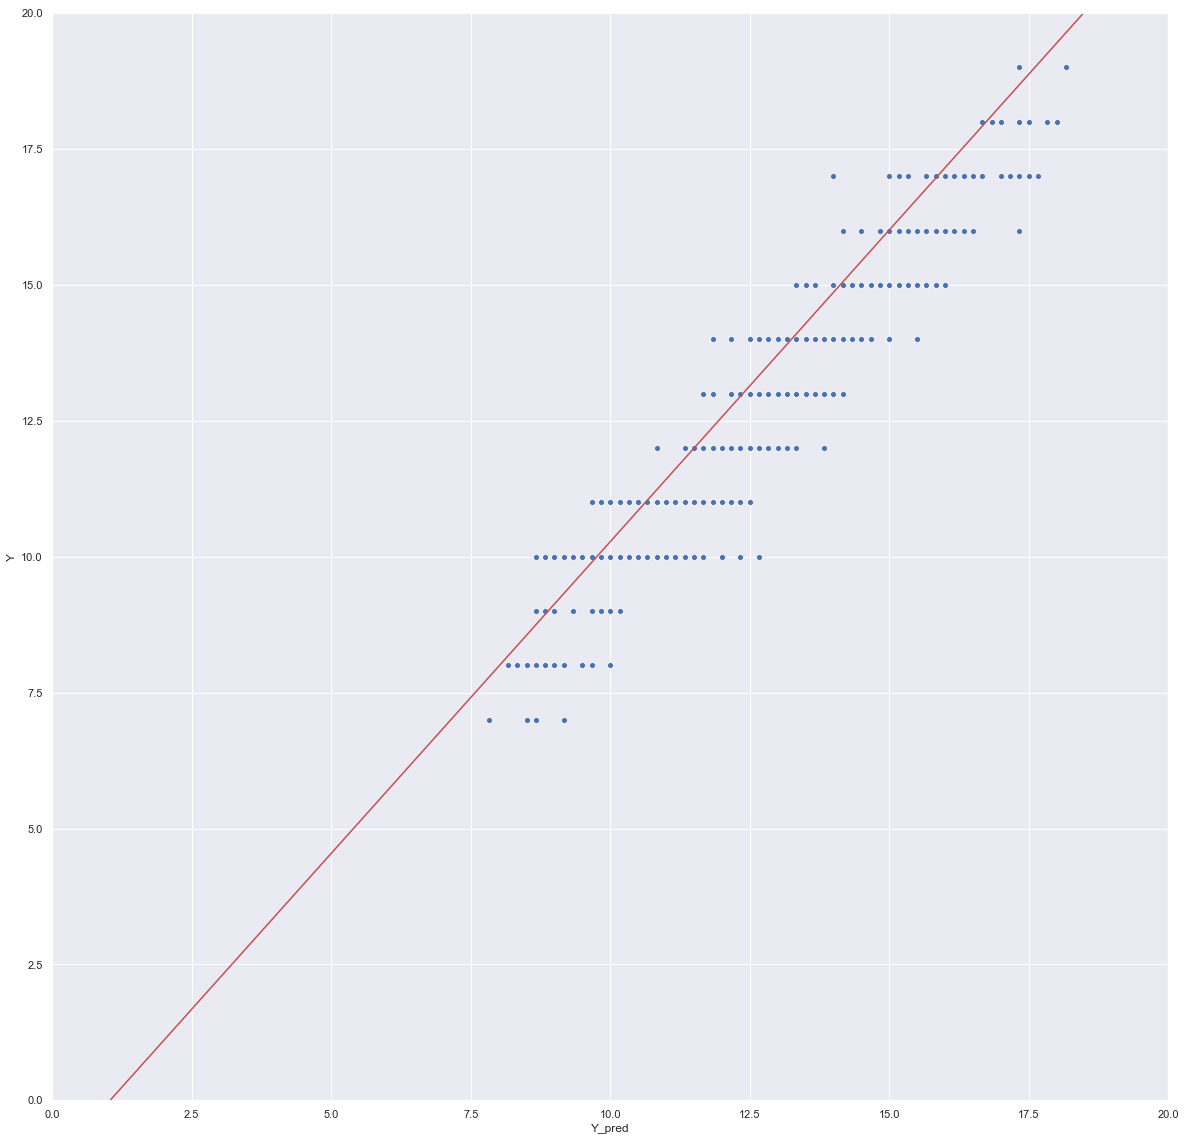

In [138]:
g=sns.scatterplot(y='Y',x='Y_pred',data=Z)
fit=np.polyfit(Y_pred,Y,1)
xp = np.linspace(0, 20, 20)
p = np.poly1d(fit)
p(xp)
plt.plot(p(xp), 'r')
sns.set(rc={'figure.figsize':(20,20)})
g.set_ylim((0,20))
g.set_xlim((0,20))

The model has pretty good accuracy with a low standard deviation in cross validation performing even better than the training set. It fits the upper 50% of the data well. Normal data cleaning should be done to eliminate noise. This model gives understanding to what makes students succesful showing not all students have the same advantages.